In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
!apt install -y fonts-nanum # 한글사용
!fc-cache -fv

applyfont = "NanumBarunGothic" # 적용폰트 = 나눔바른고딕

import matplotlib.font_manager as fm
if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
  fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

plt.rc("font", family=applyfont)
plt.rc("axes", unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [49]:
path = r"/content/drive/MyDrive/Colab Notebooks/0317/Road_invironment.csv"
df = pd.read_csv(path, encoding='cp949')
df

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례
0,2025-02-03,14:30,경기,파주시,책향기로,경기도 파주시 와동동 1421도,경기도 파주시 동패동 386-8전,-2,39,81,좋음
1,2025-02-03,14:16,경기,파주시,심학산로,경기도 파주시 와동동 1421도,경기도 파주시 문발동 541-3 도,-3,40,90,좋음
2,2025-02-03,14:05,경기,파주시,미래로,경기도 파주시 당하동 650-1 도,경기도 파주시 동패동 22-3 도,-2,39,170,나쁨
3,2025-02-03,14:01,경기,파주시,와석순환로,경기도 파주시 와동동 1421도,경기도 파주시 야당동 998도,-2,39,94,좋음
4,2025-02-03,13:49,경기,파주시,경의로,경기도 파주시 아동동 299-16 도,경기도 고양시일산서구 덕이동 319-5도,-2,39,61,좋음
...,...,...,...,...,...,...,...,...,...,...,...
1150,2025-02-28,10:03,인천,계양구,계양대로,인천광역시 계양구 계산동 1014도,인천광역시 계양구 작전동 405-2도,9,43,3,매우좋음
1151,2025-02-28,09:53,인천,계양구,계산새로,인천광역시 계양구 계산동 1107도,인천광역시 계양구 계산동 1035천,8,44,7,매우좋음
1152,2025-02-28,09:43,인천,계양구,용종로,인천광역시 계양구 병방동 438도,인천광역시 계양구 계산동 1108도,7,45,6,매우좋음
1153,2025-02-28,09:34,인천,계양구,오조산로,인천광역시 계양구 작전동 941도,인천광역시 계양구 용종동 230도,8,45,5,매우좋음


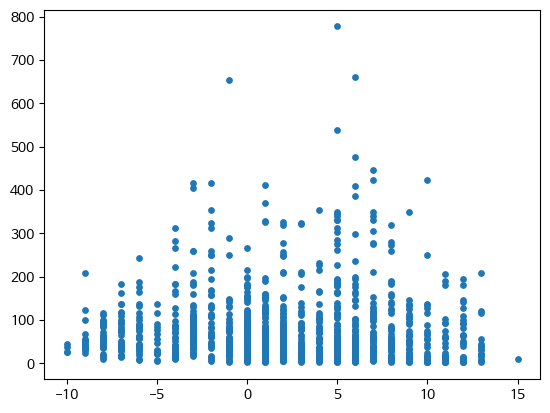

In [50]:
plt.scatter(df["기온"], df["재비산먼지 평균농도"], s=15)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, '2025-02-03'),
  Text(1, 0, '2025-02-04'),
  Text(2, 0, '2025-02-05'),
  Text(3, 0, '2025-02-10'),
  Text(4, 0, '2025-02-11'),
  Text(5, 0, '2025-02-13'),
  Text(6, 0, '2025-02-14'),
  Text(7, 0, '2025-02-17'),
  Text(8, 0, '2025-02-18'),
  Text(9, 0, '2025-02-19'),
  Text(10, 0, '2025-02-20'),
  Text(11, 0, '2025-02-21'),
  Text(12, 0, '2025-02-24'),
  Text(13, 0, '2025-02-25'),
  Text(14, 0, '2025-02-26'),
  Text(15, 0, '2025-02-27'),
  Text(16, 0, '2025-02-28')])

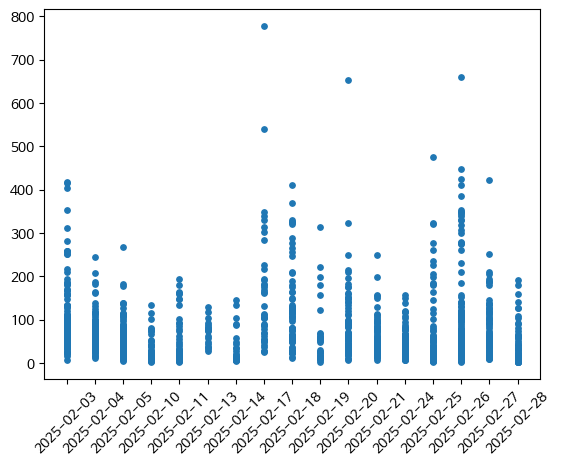

In [53]:
plt.scatter(df["측정일자"], df["재비산먼지 평균농도"], s=15)
plt.xticks(rotation=45)

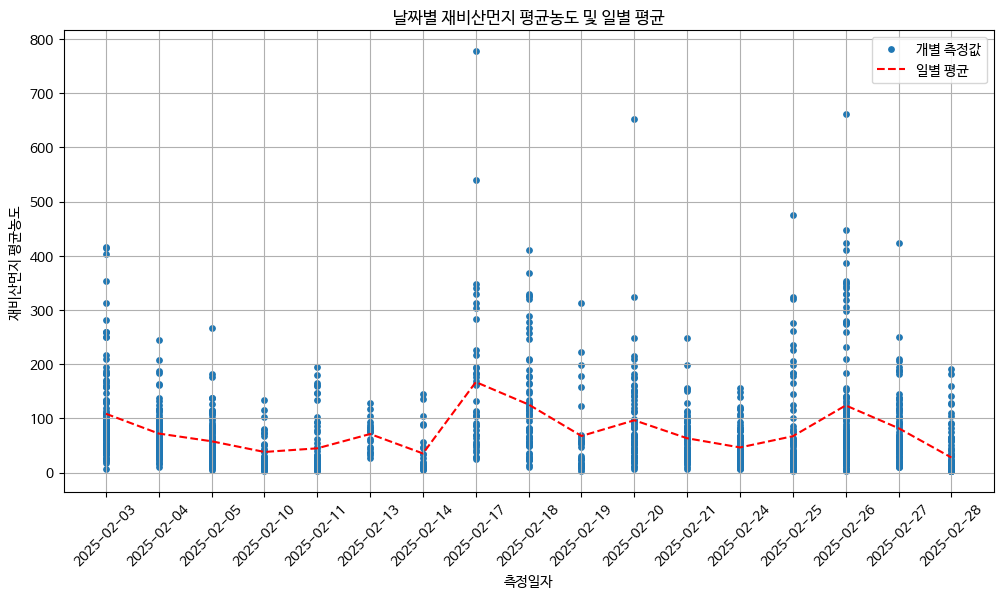

In [58]:
# 같은 날짜의 평균 재비산먼지 평균농도 계산
df_daily_avg = df.groupby("측정일자")["재비산먼지 평균농도"].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 측정일자에 따른 재비산먼지 평균농도
plt.scatter(df["측정일자"], df["재비산먼지 평균농도"], s=15, label="개별 측정값")

# 재비산 먼지 평균농도의 일별 평균
plt.plot(df_daily_avg["측정일자"], df_daily_avg["재비산먼지 평균농도"], linestyle='--', color='red', label="일별 평균")

# 그래프 설정
plt.xlabel("측정일자")
plt.ylabel("재비산먼지 평균농도")
plt.title("날짜별 재비산먼지 평균농도 및 일별 평균")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# 그래프 출력
plt.show()